# Algoritmo de Regressão Linear
### O objetivo é prever a nota do aluno baseado em suas horas de estudo.
<hr>

## Importando Pacotes

In [1]:
import pandas as pd
import numpy as np
import math
import joblib
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Carregando Dados

In [2]:
# criando os dados manualmente, x funciona como label ( explicativa ), nesse caso, horas estudadas
x_data = np.array([1,8,10,11,12,16,19]).reshape(-1,1)
# a função reshape(-1,1) é para remodelar o 'x' para ter 1 coluna e muitas linhas.


# y funciona como feature ( variável a ser predito), notas
y_data = np.array([10,40,44,47,49,60,70])

## Máquina Preditiva

In [3]:
predictive_machine = LinearRegression()
predictive_machine

LinearRegression()

## Treino

In [4]:
predictive_machine.fit(x_data, y_data)

LinearRegression()

## Teste

In [5]:
# utilizaremos os mesmos dados iniciais para predição do modelo
x_pred = predictive_machine.predict(x_data)

## Análise Gráfica dos Resultados

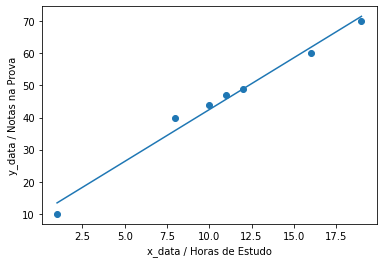

In [6]:
plt.scatter(x_data, y_data)
plt.plot(x_data, x_pred)
plt.xlabel('x_data / Horas de Estudo')
plt.ylabel('y_data / Notas na Prova')
plt.show()

## Avaliação do Modelo

In [12]:
mse = metrics.mean_squared_error(y_data, x_pred)
rmse = math.sqrt(mse)
print(f'Erro quadrático médio: {mse:.2f}\nRaiz do erro quadrático médio: {rmse:.2f}')

Erro quadrático médio: 5.33
Raiz do erro quadrático médio: 2.31


## Coeficiente e Intercept dos valores

In [8]:
print(f'Equação da estimativa da nota: y=mx+b.')
# Obtem o coeficiente da variável x ( ou a inclinação, também chamada de slope )
print(f'Valor do coeficiente ou X da equação: {predictive_machine.coef_}\nValor do intercept ou B da equação: {predictive_machine.intercept_}')
print(f'\nCalculemos um novo dado, 15 Horas estudas, pelo calculo da equação, deve retornar aproximadamente: {(3.225 * 15 + 10.239):.2f}.\nVamos testar!!!')

Equação da estimativa da nota: y=mx+b.
Valor do coeficiente ou X da equação: [3.225]
Valor do intercept ou B da equação: 10.239285714285721

Calculemos um novo dado, 15 Horas estudas, pelo calculo da equação, deve retornar aproximadamente: 58.61.
Vamos testar!!!


In [9]:
new_data = np.array([15]).reshape(1,1)
pred_new_data = predictive_machine.predict(new_data)

print(f'Valor do calculo: 58.61\nValor predito: {pred_new_data}')

Valor do calculo: 58.61
Valor predito: [58.61428571]


## Salvando Dados

In [10]:
df = pd.DataFrame({'HorasEstudadas': new_data[0], 'Nota':pred_new_data[0] })
df.to_csv('./output/02_notas_regression_model.csv', sep=";", index=False)

## Salvando o Modelo

In [13]:
joblib.dump(predictive_machine, './model/02_notas_regression_Model.pkl')

['./model/02_notas_regression_Model.pkl']

## Testando o Modelo

In [14]:
loaded_model = joblib.load('./model/02_notas_regression_Model.pkl')
new_data_deploy = np.array([20]).reshape(1,1)

result = loaded_model.predict(new_data_deploy)
print(f'Teste de Deploy\n\nInformando 20 Horas estudadas\nValor esperado: {3.225 * new_data_deploy[0] + 10.239}\nValor predito: {result}')

Teste de Deploy

Informando 20 Horas estudadas
Valor esperado: [74.739]
Valor predito: [74.73928571]
